# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***16***

### Our motivation
The NBA is one of the most popular sports leagues worldwide. It has been captivating millions of fans with its teams, players and storied history. Because of its popularity, it generate vast amount of data from game statistics to player achievements lead to create an excellent opportunity to apply data science techniques to analyze trends, identify patterns and derive meaningful insights.

Our works is designed to serve for **sports enthusiasts** who will gain a richer understanding of individual game performance and season-wide trends, **Team and League Stakeholders** who will use these insights for better decision-making and the last one, **data science community** who can learn about practical applications of data science in sports and inspiring further exploration in this field. (I hope that :>>)

### Our purpose
- Provide NBA fans, analysts and stakeholders with deeper insights into team and player performance through data-drive approaches.
- Assist coaches, managers or team owners in optimizing strategies and resources.
- Demonstrate how data science can be applied to a real-world context, showcasing the power of statistical analysis and machine learning in sports analytics.

### Our key objective
1. Which factors most influence the success of NBA teams and player?

2. What patterns and trends exists in player performance across season?

3. How can historical data be used to predict team or player success in future seasons?

### Import module

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Team names

In [102]:
nba_stats = pd.read_csv("./Data_NBA_1/nba_stats.csv")
nba_stats.set_index("#", inplace=True)

nba_stats.head()

,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
#,,,,,,,,,,,,,,,,,,,,,
1,Giannis Antetokounmpo,MIL,14,35.3,32.1,13.1,21.4,61.0,0.1,0.8,...,10.0,57.9,2.1,10.0,12.1,6.1,0.5,1.4,3.0,36.6
2,Anthony Davis,LAL,14,35.2,31.3,10.9,19.1,57.3,0.9,2.1,...,10.9,78.3,2.6,8.6,11.2,2.8,1.2,1.9,2.1,35.8
3,Jayson Tatum,BOS,15,36.5,29.9,9.3,20.1,46.4,4.3,11.0,...,8.5,81.3,0.4,7.7,8.1,5.9,1.4,0.5,2.9,30.6
4,Nikola Jokić,DEN,10,38.1,29.7,10.8,19.2,56.3,2.2,3.9,...,7.0,84.3,4.5,9.2,13.7,11.7,1.7,1.0,4.1,44.2
5,LaMelo Ball,CHA,15,33.1,28.9,9.9,23.1,42.8,4.5,12.5,...,5.3,88.6,1.0,3.9,4.9,6.7,1.2,0.2,4.2,23.9


In [103]:
nba_season_meta = pd.read_csv("./Data_NBA_2/season_meta.csv")

nba_season_meta.head()

,League Champion,Most Valuable Player,Rookie of the Year,PPG Leader,RPG Leader,APG Leader,WS Leader,Season
0,Houston Rockets,David Robinson (27.6/10.8/2.9),"Grant Hill (19.9/6.4/5.0), Jason Kidd (11.7/5....",Shaquille O'Neal (29.3),Dennis Rodman (16.8),John Stockton (12.3),David Robinson (17.5),1994-1995
1,Chicago Bulls,Michael Jordan (30.4/6.6/4.3),Damon Stoudamire (19.0/4.0/9.3),Michael Jordan (30.4),Dennis Rodman (14.9),John Stockton (11.2),Michael Jordan (20.4),1995-1996
2,Chicago Bulls,Karl Malone (27.4/9.9/4.5),Allen Iverson (23.5/4.1/7.5),Michael Jordan (29.6),Dennis Rodman (16.1),Mark Jackson (11.4),Michael Jordan (18.3),1996-1997
3,Chicago Bulls,Michael Jordan (28.7/5.8/3.5),Tim Duncan (21.1/11.9/2.7),Michael Jordan (28.7),Dennis Rodman (15.0),Rod Strickland (10.5),Karl Malone (16.4),1997-1998
4,San Antonio Spurs,Karl Malone (23.8/9.4/4.1),Vince Carter (18.3/5.7/3.0),Allen Iverson (26.8),Chris Webber (13.0),Jason Kidd (10.8),Karl Malone (9.6),1998-1999


### **Question 1: Which factors most influence the success of NBA teams and player?**
Purpose: Identify performance indicators such as shooting efficiency, defensive stats, or teamwork,... that contribute to victories.

### Question 1.1: What defines the success of NBA teams, and how is it determined?

**Answer**: We define the success of NBA teams as having a high and outstanding win percentage compared to the remaining team. To evaluate this, we will consider the win percentages of all teams over the entire period the data has.

**How to do**: We will classify the win percentage of each record into the bins and save it into the `W_PCT_Binned` column, each bin will have a range of 10%. After that, we will find the most frequently occurring value (the mode) in the `W_PCT_Binned` column and extract the records that have the `W_PCT_Binned` value. 

In [167]:
### NBA Teams
nba_team = pd.read_csv("./Data_NBA_1/nba_team_stats.csv")
nba_team.drop(columns=["Overall - ", "Year"], inplace=True)

nba_team.drop_duplicates(inplace=True)

nba_team.head()

,Team Name,GP - Games Played,MIN - Minutes Played,PTS - Points,W - Wins,L - Losses,W_PCT - Win Percentage,FGM - Field Goals Made,FGA - Field Goals Attempted,FG_PCT - Field Goal Percentage,...,FT_PCT - Free Throw Percentage,OREB - Offensive Rebounds,DREB - Defensive Rebounds,REB - Rebounds,AST - Assists,TOV - Turnovers,STL - Steals,BLK - Blocks,PF - Personal Fouls,PLUS_MINUS - Plus-Minus
0,BOSTON CELTICS,15,49.0,121.5,12,3,0.800,41.9,90.5,46.3,...,81.9,10.3,32.5,42.7,25.9,12.1,7.1,4.9,16.5,9.7
1,BOSTON CELTICS,82,48.4,120.6,64,18,0.780,43.9,90.2,48.7,...,80.7,10.7,35.6,46.3,26.9,11.9,6.8,6.6,16.2,11.3
2,BOSTON CELTICS,82,48.7,117.9,57,25,0.695,42.2,88.8,47.5,...,81.2,9.7,35.6,45.3,26.7,13.4,6.4,5.2,18.8,6.5
3,BOSTON CELTICS,82,48.5,111.8,51,31,0.622,40.7,87.4,46.6,...,81.6,10.5,35.5,46.1,24.8,13.6,7.2,5.8,18.5,7.3
4,BOSTON CELTICS,72,48.3,112.6,36,36,0.500,41.5,88.9,46.6,...,77.5,10.6,33.6,44.3,23.5,14.1,7.7,5.3,20.4,1.5


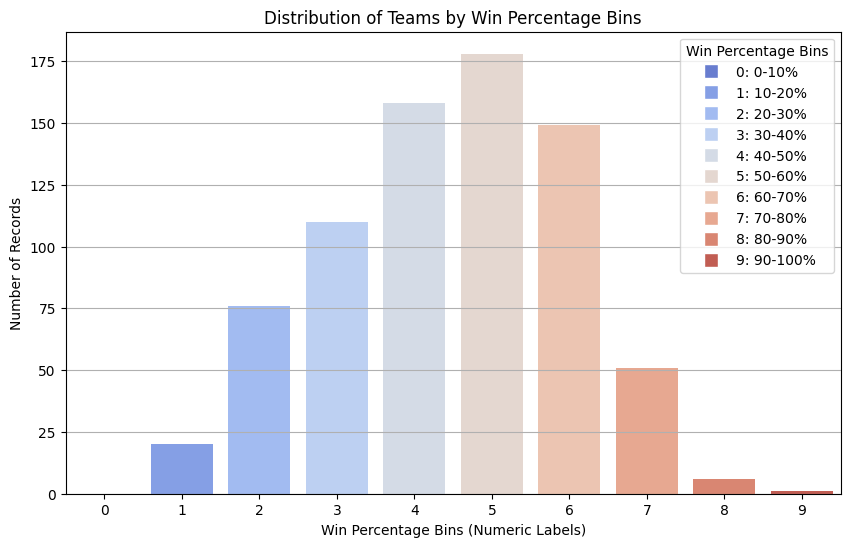

In [151]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = list(range(10))

nba_team["W_PCT_Binned"] = pd.cut(
    nba_team["W_PCT - Win Percentage"], bins=bins, labels=labels, include_lowest=True
)

bin_counts = nba_team["W_PCT_Binned"].value_counts(sort=False).reset_index()
bin_counts.columns = ["Win Percentage Bin", "Count"]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=bin_counts,
    x="Win Percentage Bin",
    y="Count",
    hue="Win Percentage Bin",
    palette="coolwarm",
)

legend_labels = [
    "0: 0-10%",
    "1: 10-20%",
    "2: 20-30%",
    "3: 30-40%",
    "4: 40-50%",
    "5: 50-60%",
    "6: 60-70%",
    "7: 70-80%",
    "8: 80-90%",
    "9: 90-100%",
]
plt.legend(
    handles=[
        plt.Line2D(
            [0],
            [0],
            marker="s",
            color="w",
            label=label,
            markerfacecolor=barplot.patches[i].get_facecolor(),
            markersize=10,
        )
        for i, label in enumerate(legend_labels)
    ],
    title="Win Percentage Bins",
    loc="upper right",
)

plt.title("Distribution of Teams by Win Percentage Bins")
plt.xlabel("Win Percentage Bins (Numeric Labels)")
plt.ylabel("Number of Records")
plt.grid(axis="y")
plt.show()

In [106]:
nba_team["W_PCT_Binned"].mode()

0    5
Name: W_PCT_Binned, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

Conclusion: The mode (the most frequently occurring value) of the `W_PCT_Binned` is 5 (equivalent to 50-60%) so we will extract the records which have the `W_PCT_Binned` higher than 5 (or higher than 60%)

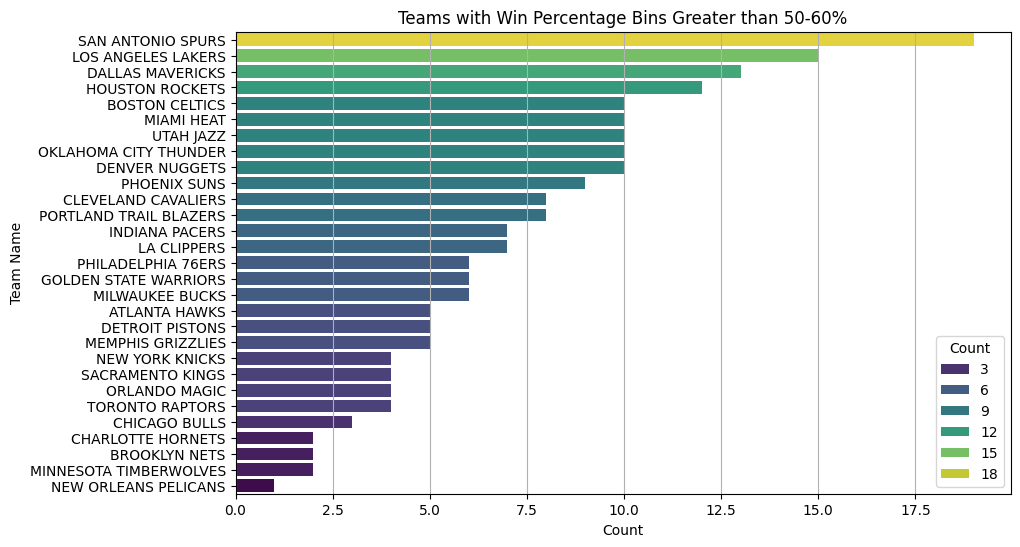

Four outstanding teams: 


,Team Name,Count
0,SAN ANTONIO SPURS,19
1,LOS ANGELES LAKERS,15
2,DALLAS MAVERICKS,13
3,HOUSTON ROCKETS,12


In [153]:
extract_nba_team = nba_team[nba_team["W_PCT_Binned"] > 5]

count_team = extract_nba_team["Team Name"].value_counts().reset_index()
count_team.columns = ["Team Name", "Count"]

plt.figure(figsize=(10, 6))
sns.barplot(data=count_team, y="Team Name", x="Count", hue="Count", palette="viridis")
plt.title("Teams with Win Percentage Bins Greater than 50-60%")
plt.xlabel("Count")
plt.ylabel("Team Name")
plt.grid(axis="x")
plt.show()

print(f"Four outstanding teams: ")
count_team[:4]

Based on the bar plot of all records showing a win percentage higher than 60%, we can identify four outstanding teams that have maintained a win percentage above 60% for over 10 years. Leading the pack is the San Antonio Spurs, with an impressive 19 years of such performance. Following closely are the Los Angeles Lakers with 15 years, the Dallas Mavericks with 13 years, and the Houston Rockets, who have achieved this feat in 12 years.

We just select the records of 4 teams to start analyzing.

In [168]:
outstanding_team = extract_nba_team[
    (extract_nba_team["Team Name"] == "SAN ANTONIO SPURS")
    | (extract_nba_team["Team Name"] == "LOS ANGELES LAKERS")
    | (extract_nba_team["Team Name"] == "DALLAS MAVERICKS")
    | (extract_nba_team["Team Name"] == "HOUSTON ROCKETS")
].reset_index()

outstanding_team.drop(columns="index", inplace=True)

outstanding_team.head()

,Team Name,GP - Games Played,MIN - Minutes Played,PTS - Points,W - Wins,L - Losses,W_PCT - Win Percentage,FGM - Field Goals Made,FGA - Field Goals Attempted,FG_PCT - Field Goal Percentage,...,OREB - Offensive Rebounds,DREB - Defensive Rebounds,REB - Rebounds,AST - Assists,TOV - Turnovers,STL - Steals,BLK - Blocks,PF - Personal Fouls,PLUS_MINUS - Plus-Minus,W_PCT_Binned
0,LOS ANGELES LAKERS,14,48.0,117.3,10,4,0.714,41.6,86.3,48.3,...,9.3,31.1,40.4,27.4,12.8,7.6,4.4,16.5,1.3,7
1,LOS ANGELES LAKERS,71,48.1,113.4,52,19,0.732,42.3,88.3,48.0,...,10.7,35.1,45.7,25.4,15.2,8.6,6.6,20.7,5.8,7
2,LOS ANGELES LAKERS,66,48.7,97.3,41,25,0.621,36.8,80.6,45.7,...,12.1,34.1,46.2,22.5,15.1,5.9,5.3,16.8,1.4,6
3,LOS ANGELES LAKERS,82,48.4,101.5,57,25,0.695,38.1,82.4,46.3,...,12.1,31.9,44.0,22.0,13.1,7.3,5.1,19.0,6.1,6
4,LOS ANGELES LAKERS,82,48.4,101.7,57,25,0.695,38.3,83.8,45.7,...,11.9,32.5,44.3,21.1,13.4,7.5,4.9,19.4,4.7,6


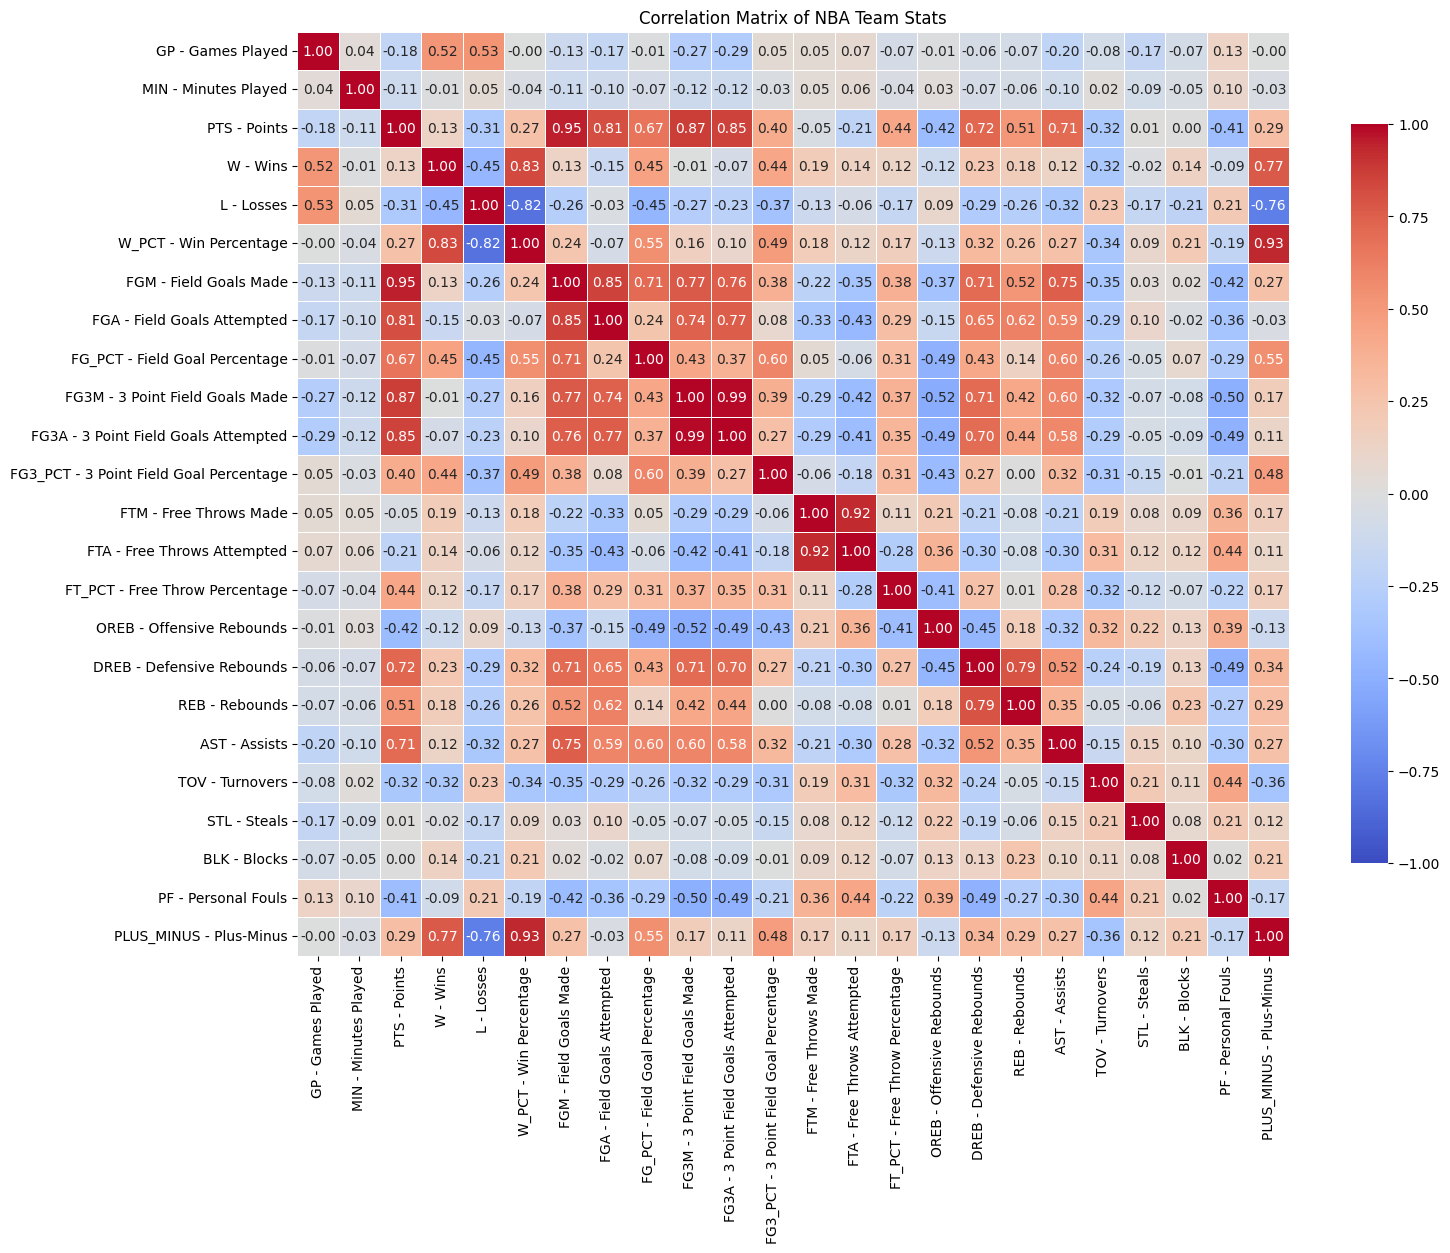

In [ ]:
correlation_matrix = nba_team.select_dtypes(include="number").corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Matrix of NBA Team Stats")
plt.show()